## Q5: Defuzzification (Maxima Methods)

In [14]:
A = [(1,0.1),(2,0.5),(3,0.9),(4,0.9),(5,0.7)]

# Height method (weighted average / centroid by membership)
num = sum(x*m for x,m in A)
den = sum(m for x,m in A)
height = num/den

# Find maxima
max_mu = max(m for x,m in A)
xs_with_max = [x for x,m in A if abs(m - max_mu) < 1e-9]
som = min(xs_with_max)
lom = max(xs_with_max)
mom = (som + lom) / 2.0

print("Height (weighted avg):", height)
print("Smallest of maxima (SOM):", som)
print("Largest of maxima (LOM):", lom)
print("Mean of maxima (MOM):",mom)

Height (weighted avg): 3.5161290322580645
Smallest of maxima (SOM): 3
Largest of maxima (LOM): 4
Mean of maxima (MOM): 3.5


## Q4: Composite Operations

In [15]:
import numpy as np

# Relation 1 (x,y)
R1 = np.array([
    [0.3, 0.7, 0.5],
    [0.9, 0.2, 0.4],
    [0.6, 0.8, 0.1]
])

# Relation 2 (y,z)
R2 = np.array([
    [0.5, 0.2, 0.9],
    [0.4, 0.6, 0.3],
    [0.7, 0.8, 0.5]
])

# Max–min composition
def max_min(R1, R2):
    result = np.zeros((R1.shape[0], R2.shape[1]))
    for i in range(R1.shape[0]):
        for j in range(R2.shape[1]):
            result[i, j] = np.max(np.minimum(R1[i, :], R2[:, j]))
    return result

# Max–product composition
def max_product(R1, R2):
    result = np.zeros((R1.shape[0], R2.shape[1]))
    for i in range(R1.shape[0]):
        for j in range(R2.shape[1]):
            result[i, j] = np.max(R1[i, :] * R2[:, j])
    return result

# Max–average composition
def max_average(R1, R2):
    result = np.zeros((R1.shape[0], R2.shape[1]))
    for i in range(R1.shape[0]):
        for j in range(R2.shape[1]):
            result[i, j] = np.max((R1[i, :] + R2[:, j]) / 2)
    return result

print("Max-Min Composite:\n", max_min(R1, R2))
print("\nMax-Product Composite:\n", max_product(R1, R2))
print("\nMax-Average Composite:\n", max_average(R1,R2))

Max-Min Composite:
 [[0.5 0.6 0.5]
 [0.5 0.4 0.9]
 [0.5 0.6 0.6]]

Max-Product Composite:
 [[0.35 0.42 0.27]
 [0.45 0.32 0.81]
 [0.32 0.48 0.54]]

Max-Average Composite:
 [[0.6  0.65 0.6 ]
 [0.7  0.6  0.9 ]
 [0.6  0.7  0.75]]


## Q2: Triangular, Trapezoidal, Gaussian, Bell Membership Functions

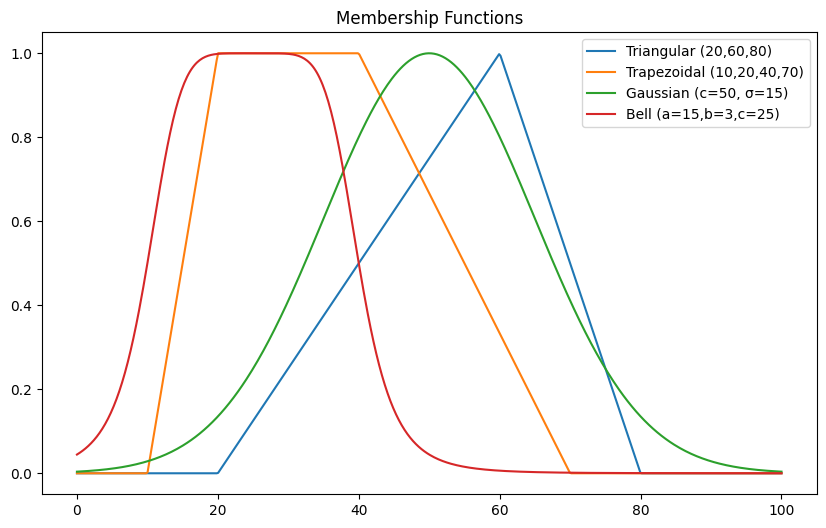

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

def trapezoidal(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x-a)/(b-a), 1), (d-x)/(d-c)), 0)

def gaussian(x, c, sigma):
    return np.exp(-0.5 * ((x-c)/sigma)**2)

def bell(x, a, b, c):
    return 1 / (1 + np.abs((x-c)/a)**(2*b))

x = np.linspace(0, 100, 500)

plt.figure(figsize=(10,6))
plt.plot(x, triangular(x, 20, 60, 80), label="Triangular (20,60,80)")
plt.plot(x, trapezoidal(x, 10, 20, 40, 70), label="Trapezoidal (10,20,40,70)")
plt.plot(x, gaussian(x, 50, 15), label="Gaussian (c=50, σ=15)")
plt.plot(x, bell(x, 15, 3, 25), label="Bell (a=15,b=3,c=25)")
plt.legend(); plt.title("Membership Functions"); plt.show()


# Q1: Concentration & Dilation of fuzzy set


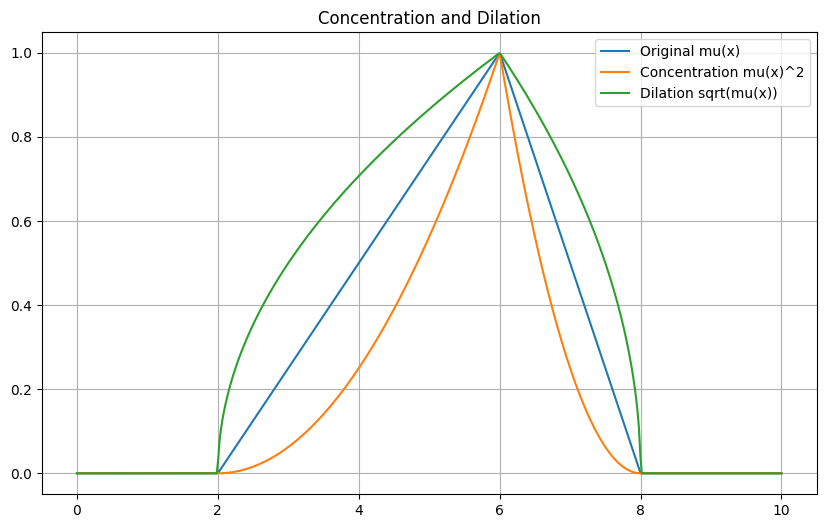

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# mu(x)^2 = Concentration
# sqrt(mu(x)) = Dilation
# mu = triangular(x, 20, 60, 80)

plt.figure(figsize=(10,6))
plt.plot(x, mu, label="Original mu(x)")
plt.plot(x, mu**2, label="Concentration mu(x)^2")
plt.plot(x, np.sqrt(mu), label="Dilation sqrt(mu(x))")
plt.legend()
plt.title("Concentration and Dilation")
plt.grid()
plt.show()

## Q3: Cylindrical Extension

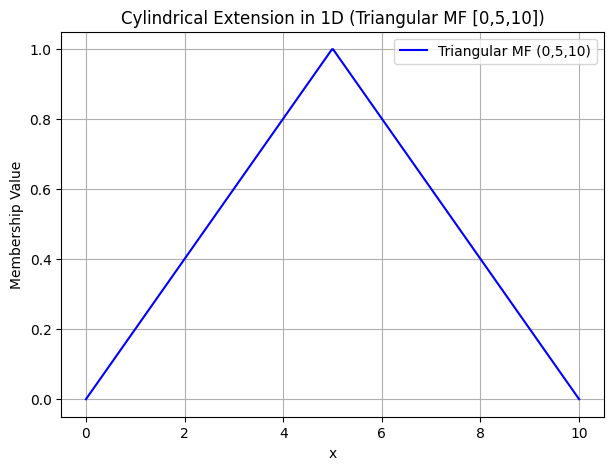

In [18]:

# 1D triangular 
import numpy as np
import matplotlib.pyplot as plt

# Triangular membership function
def triangular(x, a, b, c):
    return np.maximum(np.minimum((x-a)/(b-a), (c-x)/(c-b)), 0)

# Domain from 0 to 10
x = np.linspace(0, 10, 500)

# Triangular MF with points (0, 5, 10)
mu_x = triangular(x, 0, 5, 10)

# Plot
plt.figure(figsize=(7,5))
plt.plot(x, mu_x, label="Triangular MF (0,5,10)", color="b")
plt.xlabel("x")
plt.ylabel("Membership Value")
plt.title("Cylindrical Extension in 1D (Triangular MF [0,5,10])")
plt.grid(True)
plt.legend()
plt.show()


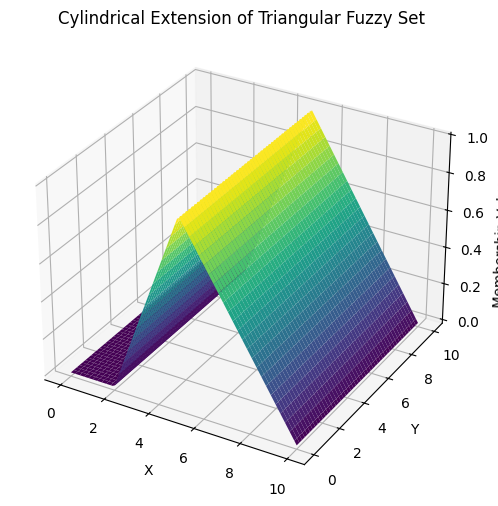

In [19]:
# Triangular membership function
def triangular(x, a, b, c):
    if x <= a or x >= c:
        return 0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x < c:
        return (c - x) / (c - b)
    else:
        return 0

# Define fuzzy set A
x_vals = np.linspace(0, 10, 100)
mu_A = [triangular(x, 2, 5, 10) for x in x_vals]

# Cylindrical extension in X-Y space
y_vals = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.array([[triangular(x, 2, 5, 10) for x in x_vals] for _ in y_vals])

# Plot 3D cylindrical extension
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Membership Value μA(x)")
ax.set_title("Cylindrical Extension of Triangular Fuzzy Set")
plt.show()